<h1><b><center>Facial Expression Recognition using CNN and SVM</center></b></h1>
<center><h3>By Nikhil Kesarkar</h3></center><center><h5>MTech Data Science<br>NMIMS, Mumbai</h5></center>
<br>
<center><h5>under the guidance of</h5><h3>Dr. Ali Habibnia<br>Dr. Sarada Samantaray</h3></center>


# Introduction

<p>&nbsp;&nbsp;&nbsp;&nbsp;Face and facial expressions are important components during human communication. Facial expressions basically tell about a human's internal emotions while speaking or talking. It is the response of emotions that are exchanged while social communications.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;So if Facial expressions are properly identified, it can add value to various industries. Consider the example of the retail industry, one can make use of Facial expression to understand the buying behaviour of the customer. The customer can be excited by looking at a particular product, or the customer can give a disgust look by looking at some inappropriate product, also a customer can give a sad expression if there is something sensitive in the product. So the retail business can make use of these expressions to enhance the business and improve efficiency. Now consider the social media example. There are n number of applications. Some applications can make use of Facial expression to auto tag how they are feeling. This can help improve their suggestions for the users. Similarly there are many more examples.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;In this work, a Facial expression recognizer is built using Convolutional Neural Network. CNN is a very useful tool for image classification. So here the images are preprocessed and then are fed to CNN to perform classifications. The input images are basically facial parts only that cover the facial expression variability. 
</p>

# Literature Review

# Data Description

<p>&nbsp;&nbsp;&nbsp;&nbsp;Dataset used in the project was developed by Pierre-Luc Carrier and Aaron Courville under the research FER-2013[1]. In this dataset, there are 35,887 images of 7 different facial expression classes, namely Angry, Disgust, Fear, Happy, Sad, Surprise and Neutral. The images are of 48x48 resolution i.e each image will have 2304 features. When the dataset was created, it had 28,709 images for training purpose and 3,589 were used for testing. The remaining 3,589 test samples were not publically avalibale.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;The dataset focusses on the facial part only i.e. all these 2304 features will focus on facial parts only. The dataset was created using Google API where the faces were automatically registered. This dataset has a wide range of variations i.e it covers pictures with glasses, without glasses, little bit of hand involvement, also contrast adjusted, etc.</p>

# Methodology

<p>&nbsp;&nbsp;&nbsp;&nbsp;Often when image classification is in consideration, there is one thought in mind: Convolutional Neural Network. As CNN provides better results than most of the traditional or even some new Machine learning Classification Algorithms, it is firstly preferred. But there might be situation where some other ML algorithm provides better results than CNN for a particular image dataset. But in real life AI image applications, CNN is considered over other ML algorithms in most of the cases.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;In this project, Facial Expression Recognition, CNN is given the prior choice. First a basic CNN model was created with 6 convolution layers along with one input and an output layer. So basically each image of 48x48 was inputted to the model for extracting the features and helping the model to learn the expressions based on some similar patterns. The first model was a trial model without any hyper parameters tuning and without any good optimization in the compilation time, it was getting over fitted i.e there was a huge difference between the training and validation loss. So for providing better results, second mode was built.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;The second CNN model was built by tuning some hyper parameters. The structure of the CNN was as same as the first model but the last layer was built in such a way that it would behave like Support Vector classifier. Also it was compiled with some tuned parameters. These tuned parameters were found by trial and error. So after all this the model over fitting was reduced to a great extent. Although the accuracy didn't improved but the model is more generalized.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;Is CNN is really the best image classifier? To answer this, SVM was implemented along with PCA. Now it is difficult to train the SVM classifier with all the classes as SVM required high performance computing, so the classes are restricted to 3. Now there is PCA used before SVM. PCA is a great method to reduce dimensions. It basically forms the principal components which are in same number as the number of features. But here the first n features say first 1000 features will represent the entire image features. Principal components are basically the linear combination of the image features. So it is very useful in case of high dimentionality. Then comes the SVM classifier. SVM basically classifies by considering the support vectors. So the parameters are SVM are tuned and made it ready for the classification.</p>

# Implementation

### Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/Facial-Expression-Recognition/fe-data.csv")
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
print("Shape of Data:", data.shape)

Shape of Data: (35887, 3)


In [ ]:
data_validation = data.loc[data[' Usage'] == "PublicTest"]
data_training = data.loc[data[' Usage'] == "Training"]

print("Shape of Training Data:", data_training.shape)
print("Shape of Validation Data:", data_validation.shape)

Shape of Training Data: (28709, 3)
Shape of Validation Data: (3589, 3)


**So there are 28709 samples for training and 3589 for testing.**

In [ ]:
data_validation = data_validation.drop(' Usage', axis=1)
data_training = data_training.drop(' Usage', axis=1)

print("Shape of Training Data:", data_training.shape)
print("Shape of Validation Data:", data_validation.shape)

Shape of Training Data: (28709, 2)
Shape of Validation Data: (3589, 2)


In [ ]:
print(type(data_training.iloc[0][1]))
data_training.iloc[0][1]

<class 'str'>


'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

**Since the pixels values in the column are in string type we need to convert them in numpy array format.**

In [ ]:
data_training[" pixels"] = data_training[" pixels"].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
data_training.head()

,emotion,pixels
0,0,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4..."
1,0,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ..."
2,2,"[231, 212, 156, 164, 174, 138, 161, 173, 182, ..."
3,4,"[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2..."
4,6,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23..."


In [ ]:
print(type(data_training.iloc[0][1]))
data_training.iloc[0][1]

<class 'numpy.ndarray'>


array([ 70,  80,  82, ..., 106, 109,  82])

In [ ]:
data_validation[" pixels"] = data_validation[" pixels"].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
print(type(data_validation.iloc[0][1]))
data_validation.iloc[0][1]

<class 'numpy.ndarray'>


array([254, 254, 254, ...,  42, 129, 180])

**Now the pixels values are in numpy array.**

In [ ]:
df = data_training.append(data_validation)

print("Shape of Final Dataset: ", df.shape)

Shape of Final Dataset:  (32298, 2)


**So the final dataset is ready and it containins 32298 training samples. There are two columns one giving pixel values and other giving its corresponding label. Each sample contains 48x48 pixel values i.e. 2304 features.**

In [ ]:
import pickle

with open('final_data.pickle', 'wb') as f:
    pickle.dump(df, f)

**Saving the data.**

### Getting Data ready for models

In [ ]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")

pick_in = open('/content/drive/MyDrive/Facial-Expression-Recognition/data_set_final.pickle', 'rb')
df = pickle.load(pick_in)
pick_in.close()

In [ ]:
X = []
y = []


for feature, label in df:
    X.append(feature)
    y.append(label)

X = np.asarray(X)
y = np.asarray(y)

print("Data Types:", type(X), type(y))
print("Lengths:", len(X), len(y))
print("Shapes:", X.shape, y.shape)

Data Types: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Lengths: 32298 32298
Shapes: (32298, 2304) (32298,)


**X and y have to be converted for inputting into model.**

In [ ]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.20,
                                                  random_state=42, shuffle=True)

In [ ]:
print("Random Training shape:", X_train.shape, y_train.shape)
print("Random Testing shape:", X_test.shape, y_test.shape)

print("Random Training Type:", type(X_train), type(y_train))
print("Random Testing Type:", type(X_test), type(y_test))

Random Training shape: (25838, 2304) (25838,)
Random Testing shape: (6460, 2304) (6460,)
Random Training Type: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Random Testing Type: <class 'numpy.ndarray'> <class 'numpy.ndarray'>


*Lets visualize some of the faces and their labels.*

Labels are as follows:

Angry = 0<br>
Disgust = 1<br>
Fear = 2<br>
Happy = 3<br>
Sad = 4<br>
Surprise = 5<br>
Neutral = 6<br>

Text(0.5, 1.0, 'Label: 3')

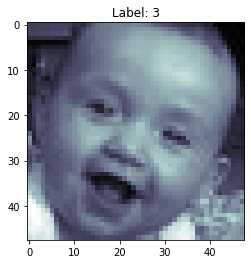

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0].reshape(48,48),cmap=plt.cm.bone)
plt.title('Label: {}'.format(y_train[0]))

Text(0.5, 1.0, 'Label: 2')

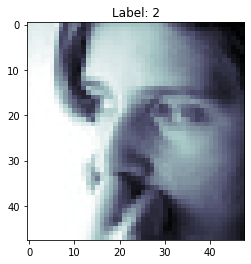

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_train[10].reshape(48,48),cmap=plt.cm.bone)
plt.title('Label: {}'.format(y_train[10]))

Text(0.5, 1.0, 'Label: 4')

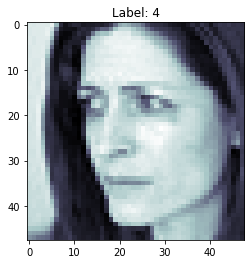

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_test[1000].reshape(48,48),cmap=plt.cm.bone)
plt.title('Label: {}'.format(y_test[1000]))

Labels for first 15 training samples: [3 6 3 3 5 2 6 4 2 3 2 4 6 4 0]


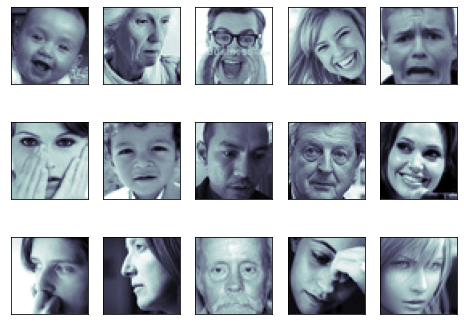

In [ ]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(48,48), cmap=plt.cm.bone)
    
print("Labels for first 15 training samples:", y_train[0:15])

### CNN Implementation

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [ ]:
import tensorflow

y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=7)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=7)

In [ ]:
import sys, os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

classes = 7
batch_size = 64
epochs = 120
width, height, depth = 48, 48, 1

In [ ]:
# Initialising the CNN

model = Sequential()

inputShape = (height, width, depth)

model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(classes))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 16, 16, 64)       

In [ ]:
lr = 1e-3
batch_size = 64

opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
history = model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          shuffle=True)

Epoch 1/120
404/404 [==============================] - 5s 10ms/step - loss: 2.4278 - accuracy: 0.2511 - val_loss: 1.4981 - val_accuracy: 0.4176
Epoch 2/120
404/404 [==============================] - 4s 9ms/step - loss: 1.6860 - accuracy: 0.3936 - val_loss: 1.3850 - val_accuracy: 0.4796
Epoch 3/120
404/404 [==============================] - 4s 10ms/step - loss: 1.4934 - accuracy: 0.4537 - val_loss: 1.4734 - val_accuracy: 0.4385
Epoch 4/120
404/404 [==============================] - 4s 10ms/step - loss: 1.3655 - accuracy: 0.4897 - val_loss: 1.4276 - val_accuracy: 0.4596
Epoch 5/120
404/404 [==============================] - 4s 10ms/step - loss: 1.2691 - accuracy: 0.5270 - val_loss: 1.2831 - val_accuracy: 0.5110
Epoch 6/120
404/404 [==============================] - 4s 10ms/step - loss: 1.2076 - accuracy: 0.5408 - val_loss: 1.2544 - val_accuracy: 0.5127
Epoch 7/120
404/404 [==============================] - 4s 10ms/step - loss: 1.1685 - accuracy: 0.5548 - val_loss: 1.2072 - val_accuracy: 

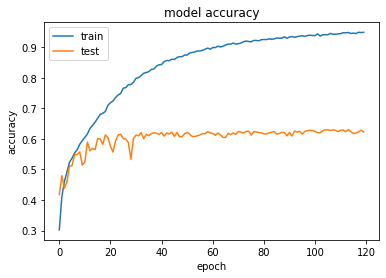

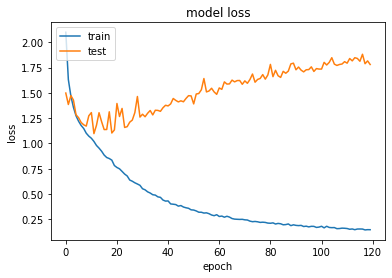

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

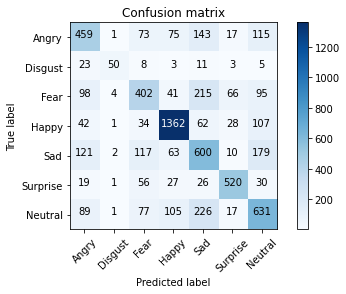

In [ ]:
# Function to plot confusion matrix    
from sklearn.metrics import confusion_matrix
import itertools 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

classs = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = classs) 

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy*100, loss))


# serialize model to JSON
model_json = model.to_json()
with open("model_CNN.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_CNN.h5")
print("Saved model to disk")

202/202 [==============================] - 1s 3ms/step - loss: 1.7803 - accuracy: 0.6229
Validation: accuracy = 62.291020  ;  loss_v = 1.780278
Saved model to disk


### CNN with tuned parameters

In [ ]:
import sys, os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2 # l2 norm

# number of possible label values
num_features = 64
num_labels = 7
batch_size = 64
epochs = 80
width, height = 48, 48

In [ ]:
# Initialising the CNN
model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

# Output layer:
#model.add(Dense(num_labels, activation='softmax'))
model.add(Dense(num_labels, kernel_regularizer=tensorflow.keras.regularizers.l2(0.01), activation='softmax'))
#model.summary()

In [ ]:
#model.compile(loss=categorical_crossentropy,
#              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
#              metrics=['accuracy'])

model.compile(loss='squared_hinge', optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

In [ ]:
history = model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          shuffle=True)

Epoch 1/80
404/404 [==============================] - 22s 48ms/step - loss: 1.3698 - accuracy: 0.2190 - val_loss: 1.2420 - val_accuracy: 0.2537
Epoch 2/80
404/404 [==============================] - 18s 44ms/step - loss: 1.2394 - accuracy: 0.2358 - val_loss: 1.2193 - val_accuracy: 0.2684
Epoch 3/80
404/404 [==============================] - 18s 45ms/step - loss: 1.2055 - accuracy: 0.2984 - val_loss: 1.1807 - val_accuracy: 0.3440
Epoch 4/80
404/404 [==============================] - 18s 45ms/step - loss: 1.1779 - accuracy: 0.3462 - val_loss: 1.1671 - val_accuracy: 0.3653
Epoch 5/80
404/404 [==============================] - 18s 45ms/step - loss: 1.1637 - accuracy: 0.3751 - val_loss: 1.1590 - val_accuracy: 0.4028
Epoch 6/80
404/404 [==============================] - 18s 45ms/step - loss: 1.1543 - accuracy: 0.4002 - val_loss: 1.1549 - val_accuracy: 0.4042
Epoch 7/80
404/404 [==============================] - 18s 45ms/step - loss: 1.1472 - accuracy: 0.4195 - val_loss: 1.1331 - val_accuracy:

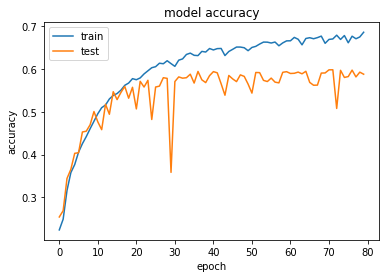

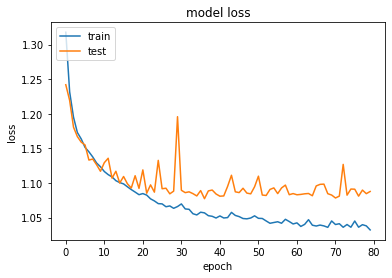

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

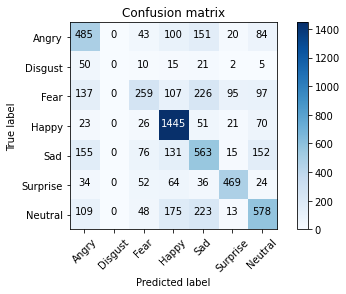

In [ ]:
# Function to plot confusion matrix    
from sklearn.metrics import confusion_matrix
import itertools 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

classs = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = classs) 

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy*100, loss))


# serialize model to JSON
model_json = model.to_json()
with open("model_CNN_tuned.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_CNN_tuned.h5")
print("Saved model to disk")

202/202 [==============================] - 2s 9ms/step - loss: 1.0877 - accuracy: 0.5881
Validation: accuracy = 58.808047  ;  loss_v = 1.087716
Saved model to disk


### Some Predictions on Random images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import model_from_json
import numpy
import os
import warnings
warnings.filterwarnings("ignore")

# load json and create model
json_file = open('/content/drive/MyDrive/Prof-Ali-Project/model/model_CNN_tuned.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("/content/drive/MyDrive/Prof-Ali-Project/model/model_CNN_tuned.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_emotion(img, model):
	EMOTIONS_LIST = ["Angry", "Disgust",
                     "Fear", "Happy",
                     "Neutral", "Sad",
                     "Surprise"]
	preds = model.predict(img)
	return EMOTIONS_LIST[np.argmax(preds)]

facec = cv2.CascadeClassifier('/content/drive/MyDrive/Prof-Ali-Project/haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX


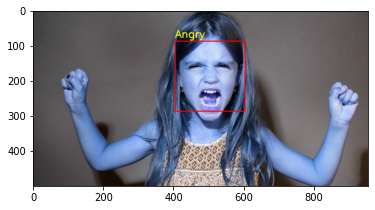

In [ ]:
fr = img = cv2.imread("/content/drive/MyDrive/Prof-Ali-Project/test_images/test-1.jpeg", cv2.IMREAD_COLOR)
gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
faces = facec.detectMultiScale(gray_fr, 1.3, 5)

for (x, y, w, h) in faces:
  fc = gray_fr[y:y+h, x:x+w]

  roi = cv2.resize(fc, (48, 48))
  pred = predict_emotion(roi[np.newaxis, :, :, np.newaxis], model)

  cv2.putText(fr, pred, (x, y-10), font, 1, (255, 255, 0), 2)
  cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)
        
plt.imshow(fr)
plt.show()

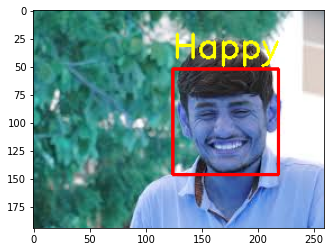

In [ ]:
fr = img = cv2.imread("/content/drive/MyDrive/Prof-Ali-Project/test_images/test-15.jpeg", cv2.IMREAD_COLOR)
gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
faces = facec.detectMultiScale(gray_fr, 1.3, 5)

for (x, y, w, h) in faces:
  fc = gray_fr[y:y+h, x:x+w]

  roi = cv2.resize(fc, (48, 48))
  pred = predict_emotion(roi[np.newaxis, :, :, np.newaxis], model)

  cv2.putText(fr, pred, (x, y-10), font, 1, (255, 255, 0), 2)
  cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)
        
plt.imshow(fr)
plt.show()

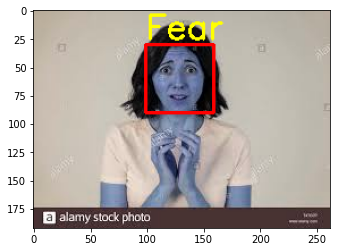

In [ ]:
fr = img = cv2.imread("/content/drive/MyDrive/Prof-Ali-Project/test_images/test-9.jpeg", cv2.IMREAD_COLOR)
gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
faces = facec.detectMultiScale(gray_fr, 1.3, 5)

for (x, y, w, h) in faces:
  fc = gray_fr[y:y+h, x:x+w]

  roi = cv2.resize(fc, (48, 48))
  pred = predict_emotion(roi[np.newaxis, :, :, np.newaxis], model)

  cv2.putText(fr, pred, (x, y-5), font, 1, (255, 255, 0), 2)
  cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)
        
plt.imshow(fr)
plt.show()

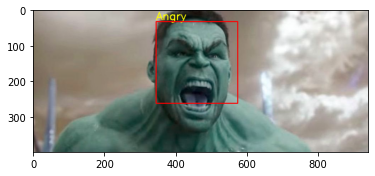

In [ ]:
fr = img = cv2.imread("/content/drive/MyDrive/Prof-Ali-Project/test_images/test-2.jpeg", cv2.IMREAD_COLOR)
gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
faces = facec.detectMultiScale(gray_fr, 1.3, 5)

for (x, y, w, h) in faces:
  fc = gray_fr[y:y+h, x:x+w]

  roi = cv2.resize(fc, (48, 48))
  pred = predict_emotion(roi[np.newaxis, :, :, np.newaxis], model)

  cv2.putText(fr, pred, (x, y-5), font, 1, (255, 255, 0), 2)
  cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)
        
plt.imshow(fr)
plt.show()

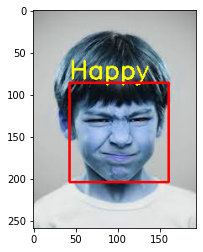

In [ ]:
fr = img = cv2.imread("/content/drive/MyDrive/Prof-Ali-Project/test_images/test-5.jpeg", cv2.IMREAD_COLOR)
gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
faces = facec.detectMultiScale(gray_fr, 1.3, 5)

for (x, y, w, h) in faces:
  fc = gray_fr[y:y+h, x:x+w]

  roi = cv2.resize(fc, (48, 48))
  pred = predict_emotion(roi[np.newaxis, :, :, np.newaxis], model)

  cv2.putText(fr, pred, (x, y-5), font, 1, (255, 255, 0), 2)
  cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)
        
plt.imshow(fr)
plt.show()

Loaded model from disk


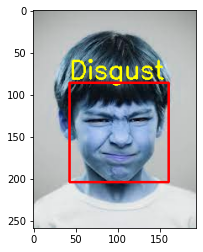

In [ ]:
# Let us try with the model which is not tuned

# loading the CNN model without tuning
json_file = open('/content/drive/MyDrive/Prof-Ali-Project/model/model_CNN.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("/content/drive/MyDrive/Prof-Ali-Project/model/model_CNN.h5")
print("Loaded model from disk")

fr = img = cv2.imread("/content/drive/MyDrive/Prof-Ali-Project/test_images/test-5.jpeg", cv2.IMREAD_COLOR)
gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
faces = facec.detectMultiScale(gray_fr, 1.3, 5)

for (x, y, w, h) in faces:
  fc = gray_fr[y:y+h, x:x+w]

  roi = cv2.resize(fc, (48, 48))
  pred = predict_emotion(roi[np.newaxis, :, :, np.newaxis], model)

  cv2.putText(fr, pred, (x, y-5), font, 1, (255, 255, 0), 2)
  cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)
        
plt.imshow(fr)
plt.show()

### SVM for 3 classes: Angry, Fear, Happy

In [ ]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")

pick_in = open('/content/drive/MyDrive/Facial-Expression-Recognition/data_set_final.pickle', 'rb')
df = pickle.load(pick_in)
pick_in.close()

In [ ]:
X = []
y = []


for feature, label in df:
  if label in (0,2,3):
    X.append(feature)
    y.append(label)

X = np.asarray(X)
y = np.asarray(y)

print("Data Types:", type(X), type(y))
print("Lengths:", len(X), len(y))
print("Shapes:", X.shape, y.shape)

Data Types: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Lengths: 17165 17165
Shapes: (17165, 2304) (17165,)


In [ ]:
# Changing class numbers
y = np.where(y == 2, 1, y)
y = np.where(y == 3, 2, y)

In [ ]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25,
                                                  random_state=42, shuffle=True)

In [ ]:
print("Random Training shape:", X_train.shape, y_train.shape)
print("Random Testing shape:", X_test.shape, y_test.shape)

print("Random Training Type:", type(X_train), type(y_train))
print("Random Testing Type:", type(X_test), type(y_test))

Random Training shape: (12873, 2304) (12873,)
Random Testing shape: (4292, 2304) (4292,)
Random Training Type: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Random Testing Type: <class 'numpy.ndarray'> <class 'numpy.ndarray'>


*Lets visualize some of the faces and their labels.*

Labels are as follows:

Angry = 0<br>
Fear = 1<br>
Happy = 2<br>

Text(0.5, 1.0, 'Label: 2')

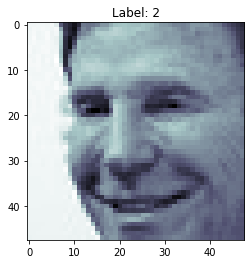

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0].reshape(48,48),cmap=plt.cm.bone)
plt.title('Label: {}'.format(y_train[0]))

Text(0.5, 1.0, 'Label: 2')

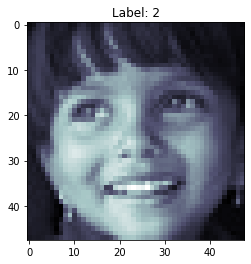

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_train[10].reshape(48,48),cmap=plt.cm.bone)
plt.title('Label: {}'.format(y_train[10]))

Text(0.5, 1.0, 'Label: 0')

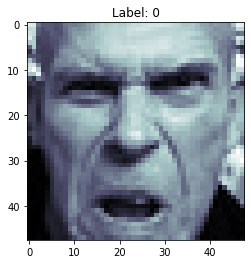

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_test[2000].reshape(48,48),cmap=plt.cm.bone)
plt.title('Label: {}'.format(y_test[2000]))

Labels for first 15 training samples: [2 2 2 1 0 1 2 2 2 2 2 1 0 0 2]


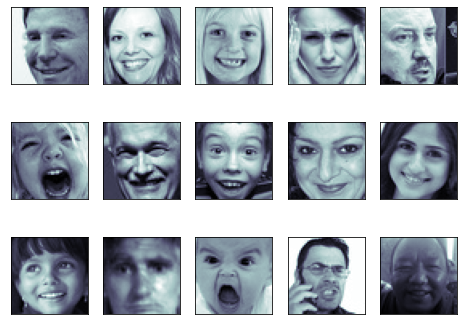

In [ ]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(48,48), cmap=plt.cm.bone)
    
print("Labels for first 15 training samples:", y_train[0:15])

### PCA Implementation

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

(2304, 2304)


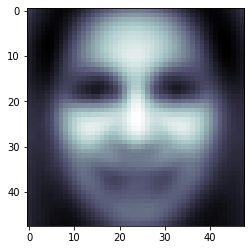

In [ ]:
# Average face
print(pca.components_.shape)
plt.imshow(pca.mean_.reshape(X_train[0].reshape(48,48).shape),
           cmap=plt.cm.bone)

In [ ]:
k = X_train[0]
k = k.reshape(48,48)
k.shape

(48, 48)

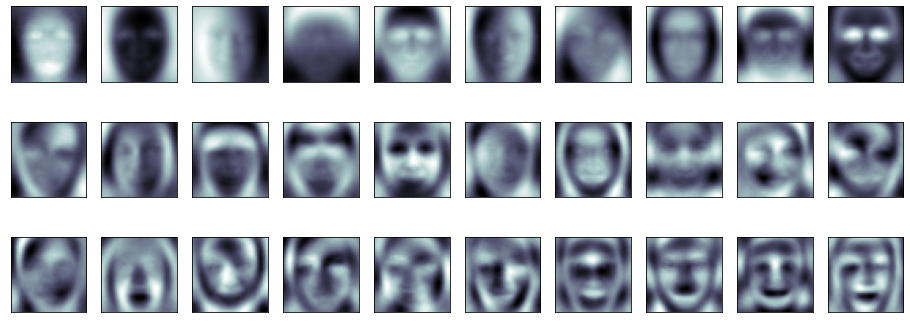

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(k.shape),
              cmap=plt.cm.bone)

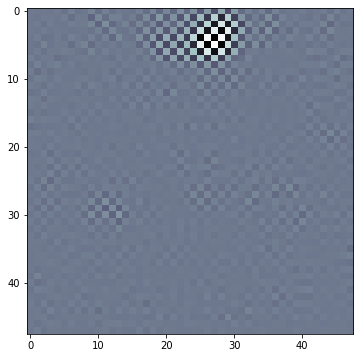

In [ ]:
# Last Principal Component

fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot()
ax.imshow(pca.components_[2303].reshape(k.shape),
              cmap=plt.cm.bone)

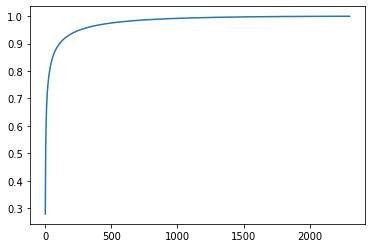

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=1300).fit(X_train)

projected = pca1.fit_transform(X_train) 
print(projected.shape)

(12873, 1300)


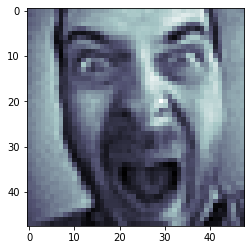

In [ ]:
# Inversing PCA to check whether we could retrieve the image
inv_proj3 = pca1.inverse_transform(projected)
inv_proj3.shape
plt.imshow(inv_proj3[22].reshape(48,48),cmap=plt.cm.bone)

### Building model using PCA and SVM

In [ ]:
pca = PCA(n_components=1300).fit(X_train)
X_train_pca = pca.transform(X_train)
X_train_pca.shape

(12873, 1300)

In [ ]:
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(4292, 1300)

### Optimizing parameters for SVM

In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!ls  # Check if required cuda 9.0 amd64-deb file is downloaded
!dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!ls /var/cuda-repo-9-0-local | grep .pub
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!sudo apt-get install cuda-9.0

--2021-04-30 14:57:03--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.0.24
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.0.24|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.0/prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb [following]
--2021-04-30 14:57:03--  https://developer.nvidia.com/compute/cuda/9.0/prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64.deb?SuWuZbyeUXjZEvGx0dL3yIx5aLPO94z0bINm05Nhgj50wGaA9m7VqkVNbBCR-UGimsi3WttZetyWniSJyUxg_3hm8EAIwNOOm

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


In [ ]:
!pip install thundersvm

     |████████████████████████████████| 512kB 18.0MB/s 


In [ ]:
from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
from thundersvm import SVC

param_grid = [
    {'C': [0.5, 1, 10, 100, 1000],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(X_train_pca, y_train)

print(optimal_params.best_params_)

In [ ]:
clf = SVC(C=100, gamma=0.01, kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy score: ",clf.score(X_test, y_test))

In [ ]:
import joblib
joblib.jump(clf, "svm_model.joblib")

In [ ]:
# load the model from disk
loaded_svc = joblib.load("svm_model.joblib")

In [ ]:
# Function to plot confusion matrix    
from sklearn.metrics import confusion_matrix
import itertools 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

classs = ["Angry", "Fear", "Happy"]

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = classs) 

# References

[1] Carrier, P. L., Courville, A., Goodfellow, I. J., Mirza, M., &
Bengio, Y. FER-2013 face database. Universit de Montreal, 2013.